**Aikins Acheampong**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 4 | Principal component analysis

Principal component analysis (PCA) is a technique to reduce the dimensionality of a dataset while losing the least amount of information about the data variables. Before implementing PCA and exploring its use with different datasets, you will explore what happens when you manually reduce the dimensionality of a mystery dataset from 3D to 2D.

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [2]:
from data_transformations import normalize, center, rotation_matrix_3d
from scatter3d import scatter3dplot

## Task 1: Dimensionality reduction by hand

### 1a. Load and visualize mystery dataset

Load in the mystery dataset (`mystery.csv`) as a pandas DataFrame below. Print out the header and the first five rows of data. You should see:

```
	       x	        y	        z	   color
0	6.183216	86.707892	90.551566	4.810163
1	0.969658	16.972285	137.976605	9.442446
2	0.727076	57.112193	139.795502	9.384942
3	8.433828	30.348513	113.600202	5.973703
4	8.188306	133.978413	120.671505	6.051754
```

**Note:** The `mystery.csv` does not have a types row. Going forward, csv files we work with won't have the types row.

In [3]:
mystery_df = pd.read_csv('data/mystery.csv')
print(mystery_df.head(5))

          x           y           z     color
0  6.183216   86.707892   90.551566  4.810163
1  0.969658   16.972285  137.976605  9.442446
2  0.727076   57.112193  139.795502  9.384942
3  8.433828   30.348513  113.600202  5.973703
4  8.188306  133.978413  120.671505  6.051754


Select the x, y, and z variables from the pandas DataFrame and [convert it to a numpy ndarray](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [4]:
data_xyz = mystery_df[['x', 'y', 'z']].to_numpy()

Use the provided `scatter3dplot` function in `scatter3d.py` to make a 3D scatter plot of the `x`, `y`, and `z` numeric variables. Set the color keyword argument to the `color` variable value from the pandas DataFrame (`len=2000`).

Set the plot bounds (`lims` keyword argument) so that the **entire** dataset appears within the 3D scatter plot. In the provided `scatter3dplot` function, the plot limits that you pass in apply to **all** x, y, and z axes. It may be helpful to print out the min and max of each variable and make sure the bounds that you select encompass all the samples.

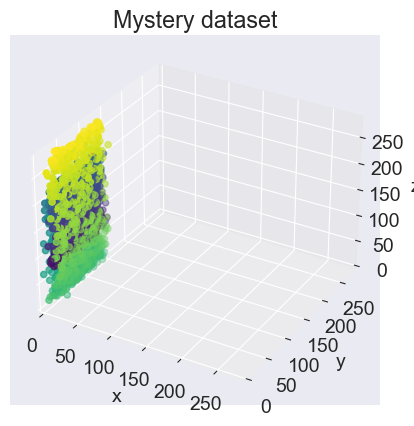

In [5]:
color = mystery_df['color'].to_numpy()

x_min, x_max = mystery_df['x'].min(), mystery_df['x'].max()
y_min, y_max = mystery_df['y'].min(), mystery_df['y'].max()
z_min, z_max = mystery_df['z'].min(), mystery_df['z'].max()

lims_min = min(x_min, y_min, z_min)
lims_max = max(x_max, y_max, z_max)
lims = (lims_min, lims_max)


scatter3dplot(data_xyz= data_xyz, color=color, lims=lims)

### 1b. Preprocess mystery dataset (1/2): Normalize

Implement the `normalize` function in `data_transformations.py` then perform min-max normalization on the `x`, `y`, and `z` values in the mystery dataset.

Use `scatter3dplot` to make a 3D scatterplot of the normalized dataset. Set the color as before, but update the plot limits appropriately based on the new normalized data range.

<!-- In **two lines of code** below, print out the mins and maxes of **each variable** and verify that the data variables are normalized as expected. As above, you should print two length-3 ndarrays — the min and max of each variable (x, y, z) -->

Mins: [0. 0. 0.]
Maxes: [1. 1. 1.]


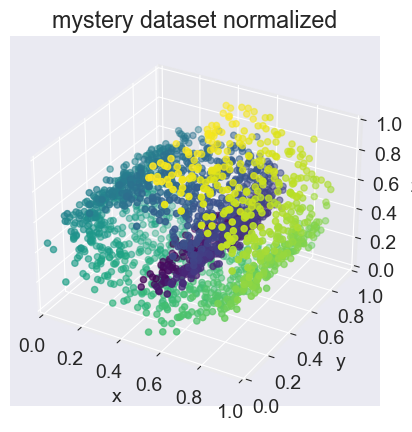

In [6]:
normalized_xyz = normalize(data_xyz)

print("Mins:", normalized_xyz.min(axis=0))
print("Maxes:", normalized_xyz.max(axis=0))

scatter3dplot(data_xyz= normalized_xyz, color=color, title='mystery dataset normalized', lims=(0,1))

### 1c. Questions

**Question 1:** What are the min and max values of each variable in the normalized dataset?

**Question 2:** Describe the shape and structure of the normalized mystery dataset. **Why** was the appearance of the dataset not obvious when plotting the raw un-normalized dataset?

**Answer 1:**

- **Min values**: `[0.0, 0.0, 0.0]`
- **Max values**: `[1.0, 1.0, 1.0]`


**Answer 2:**

The dataset has a somewhat spirally elongated shape.
  
Before normalization, the raw data had different ranges for the `x`, `y`, and `z` variables. This led to one or more axes dominating the plot, which caused the structure of the dataset to be less visible.


### 1d. Preprocess mystery dataset (2/2): Center

Implement the `center` function in `data_transformations.py` then center the `x`, `y`, and `z` values in the **normalized** mystery dataset. Then use `scatter3dplot` to make a 3D scatterplot of the normalized and centered dataset. Set the color as before.

Update the plot limits appropriately based on the new expected data range so that all data samples appear in the plot, but minimize "filler space" around the dataset in the plot (*i.e. we want to view the full dataset close-up in detail*).

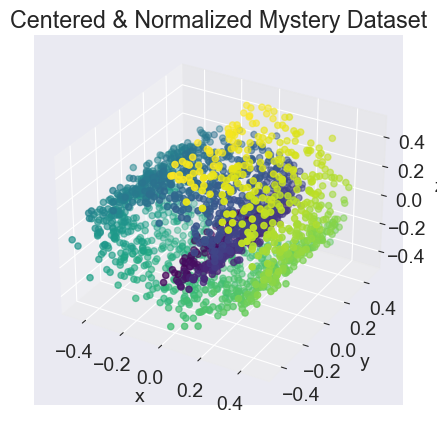

In [7]:
centered_normalized_xyz = center(normalized_xyz)

x_min, x_max = centered_normalized_xyz[:, 0].min(), centered_normalized_xyz[:, 0].max()
y_min, y_max = centered_normalized_xyz[:, 1].min(), centered_normalized_xyz[:, 1].max()
z_min, z_max = centered_normalized_xyz[:, 2].min(), centered_normalized_xyz[:, 2].max()

lims_min = min(x_min, y_min, z_min)
lims_max = max(x_max, y_max, z_max)
lims = (lims_min, lims_max)


scatter3dplot(data_xyz= centered_normalized_xyz, color=color, lims=lims, title='Centered & Normalized Mystery Dataset')

### 1e. Questions

**Question 3:** Verify below that the normalized mystery dataset is now also centered. **Note:** It is totally fine if you have some `-0.` values.

**Question 4:** What are the min and max values of each variable in the normalized and centered dataset? Briefly describe **why** these new min and max values make sense.

**Answer 3:** 

Means after centering: [0. 0. 0.] 

These mean values verifies that the normalized mystery dataset is centered.


**Answer 4:** 

Min values after centering: [-0.50103 -0.49286 -0.47661]
Max values after centering: [0.49897 0.50714 0.52339]

These new min and max values make sense because after normalization, all values were scaled to the range [0, 1]. Centering shifts the data by subtracting the mean, which results in values falling within the range [-0.5, 0.5]. This happens because the mean of a normalized variable is around 0.5, and subtracting 0.5 shifts the range to approximately [-0.5, 0.5].


In [8]:
# Verify centered property
print("Means after centering:", np.mean(centered_normalized_xyz, axis=0))

# Verify min-maxes
print("Min values after centering:", np.min(centered_normalized_xyz, axis=0))
print("Max values after centering:", np.max(centered_normalized_xyz, axis=0))


Means after centering: [0. 0. 0.]
Min values after centering: [-0.50103 -0.49286 -0.47661]
Max values after centering: [0.49897 0.50714 0.52339]


### 1f. Projecting mystery dataset from 3D to 2D (1/2)

In the cell below, create a 2D scatter plot showing just the `x` and `y` variables in the normalized and centered mystery dataset.

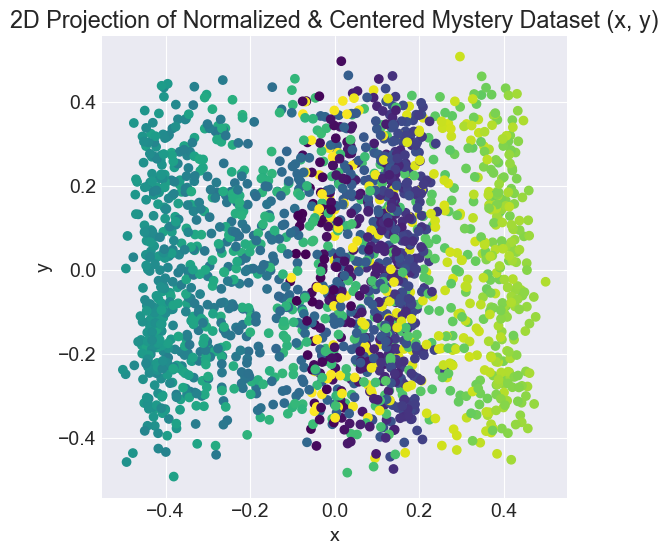

In [9]:

x_centered = centered_normalized_xyz[:, 0]
y_centered = centered_normalized_xyz[:, 1]


plt.figure(figsize=(6, 6))
plt.scatter(x_centered, y_centered, c=color, cmap='viridis')
plt.title('2D Projection of Normalized & Centered Mystery Dataset (x, y)')
plt.xlabel('x')
plt.ylabel('y')


plt.show()

### 1g. Questions

**Question 5:** Based on your 2D scatter plot, does the projection that you performed in Task 1f look like a "helpful" lower dimensional representation of the dataset? **Why?**


**Answer 5:**

While the 2D projection does provide some visualization of the data, it is not the most helpful for capturing the full structure and complexity present in the 3D dataset.

### 1h. Implement `rotation_matrix_3d`

In `data_transformations.py` implement `rotation_matrix_3d` then test it below.

#### Test `rotation_matrix_3d`

In [10]:
# Test rotate about x axis
print('Your 3D Rotation matrix about x axis by +30° is:')
print(rotation_matrix_3d(30, axis='x'))
print('and should be:')
print('''[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]''')

# Test rotate about y axis
print('Your 3D Rotation matrix about y axis by -15° is:')
print(rotation_matrix_3d(-15, axis='y'))
print('and should be:')
print('''[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]''')

# Test rotate about z axis
print('Your 3D Rotation matrix about z axis by 45° is:')
print(rotation_matrix_3d(45, axis='z'))
print('and should be:')
print('''[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]''')

Your 3D Rotation matrix about x axis by +30° is:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
and should be:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
Your 3D Rotation matrix about y axis by -15° is:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
and should be:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
Your 3D Rotation matrix about z axis by 45° is:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
and should be:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]


### 1i. Projecting mystery dataset from 3D to 2D (2/2)

Reduce the dimensionality of the **normalized and centered** mystery dataset from 3D -> 2D while doing a better job at preserving the "rolled" shape than in Task 1f. Do this below by projecting the 3D dataset into the (`x`, `y`) plane just like you did in Task 1f (i.e. make a 2D scatter plot of `x` and `y`), but this time rotate the 3D normalized and centered mystery dataset **beforehand**. The amount of 3D rotation and the axis about which it is performed is up to you.

Your goal is to rotate the 3D dataset so that the "rolled" spiral structure (*i.e. the key shape of the dataset*) comes into view of the `x`-`y` plane/axis when you project the dataset down into 2D via your 2D scatter plot.

The cell below should show a 2D scatter plot with the spiral/rolled structure clearly visible.

**Note:** It should be helpful to plot the normalized and centered mystery dataset in 3D with `scatter3dplot` before and after the rotation.

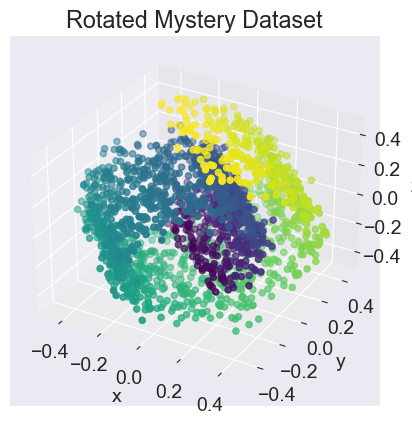

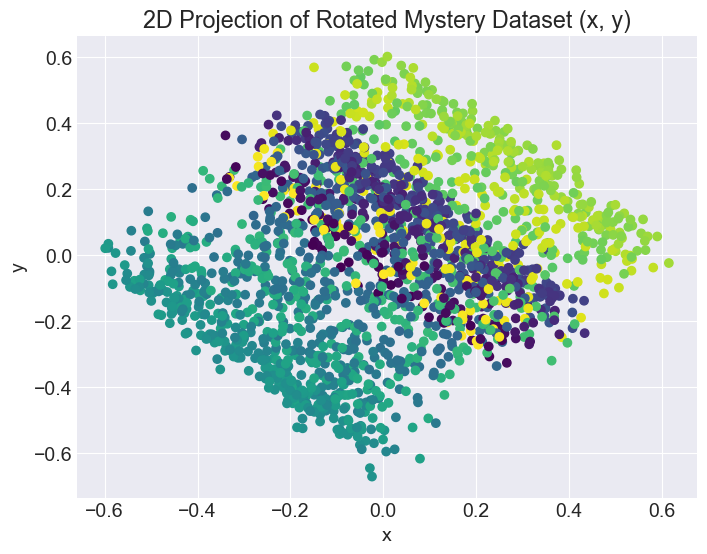

In [11]:
rotation_matrix = rotation_matrix_3d(45, axis='z')

rotated_data = centered_normalized_xyz @ rotation_matrix.T 


scatter3dplot(rotated_data, color=color, title='Rotated Mystery Dataset', lims=(-0.5, 0.5))

plt.figure(figsize=(8, 6))
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], c=color, cmap='viridis')
plt.title('2D Projection of Rotated Mystery Dataset (x, y)')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
